In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [23]:
df=pd.read_csv('res/data.csv').round(2)
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.25,49,0,Self_Employed,Tier_1,13391.17,0.00,2206.49,6658.77,2636.97,...,6200.54,11265.63,1685.70,328.90,465.77,195.15,678.29,67.68,0.00,85.74
1,26858.60,34,2,Retired,Tier_2,5371.72,0.00,869.52,2818.44,1543.02,...,1923.18,9676.82,540.31,119.35,141.87,234.13,286.67,6.60,56.31,97.39
2,50367.61,35,1,Student,Tier_3,7555.14,4612.10,2201.80,6313.22,3221.40,...,7050.36,13891.45,1466.07,473.55,410.86,459.97,488.38,7.29,106.65,138.54
3,101455.60,21,0,Self_Employed,Tier_3,15218.34,6809.44,4889.42,14690.15,7106.13,...,16694.97,31617.95,1875.93,762.02,1241.02,320.19,1389.82,193.50,0.00,296.04
4,24875.28,52,4,Professional,Tier_2,4975.06,3112.61,635.91,3034.33,1276.16,...,1874.10,6265.70,788.95,68.16,61.71,187.17,194.12,47.29,67.39,96.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.47,51,4,Self_Employed,Tier_1,12274.04,7703.85,1646.80,5477.40,2084.23,...,1163.32,1163.32,597.03,287.32,347.66,145.84,212.83,44.90,98.77,190.59
19996,90295.77,21,1,Student,Tier_2,18059.15,0.00,2770.59,13118.22,4633.11,...,10613.59,30725.18,3854.82,359.60,911.27,424.06,1555.55,129.66,239.45,351.44
19997,40604.57,30,1,Professional,Tier_2,8120.91,8089.61,1548.56,6018.28,2493.56,...,2267.91,2267.91,1385.51,379.93,138.21,297.70,824.57,57.89,72.73,122.57
19998,118157.82,27,2,Professional,Tier_1,35447.35,12345.91,4735.67,16392.44,8248.24,...,10603.68,10603.68,3217.77,2265.87,726.25,273.91,859.23,98.96,92.19,569.81


In [4]:
df.isnull().sum()

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

In [26]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Income,20000.0,NaN,NaN,NaN,41585.496094,40014.54052,1301.19,17604.88,30185.38,51765.4475,1079728.37
Age,20000.0,NaN,NaN,NaN,41.03145,13.578725,18.0,29.0,41.0,53.0,64.0
Dependents,20000.0,NaN,NaN,NaN,1.99595,1.417616,0.0,1.0,2.0,3.0,4.0
Occupation,20000,4,Retired,5019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,20000,3,Tier_2,10068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rent,20000.0,NaN,NaN,NaN,9115.494612,9254.228143,235.37,3649.4225,6402.75,11263.9425,215945.67
Loan_Repayment,20000.0,NaN,NaN,NaN,2049.800309,4281.789945,0.0,0.0,0.0,2627.145,123080.68
Insurance,20000.0,NaN,NaN,NaN,1455.028773,1492.938439,30.0,580.2025,1017.125,1787.16,38734.93
Groceries,20000.0,NaN,NaN,NaN,5205.667462,5035.953675,154.08,2165.425,3741.09,6470.895,119816.9
Transport,20000.0,NaN,NaN,NaN,2704.466705,2666.34563,81.23,1124.5825,1933.845,3360.6,81861.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [7]:
df.sample(10)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
9629,153439.214286,21,0,Student,Tier_1,46031.764286,29657.007151,4687.537942,20800.295906,11792.378352,...,10578.086682,10578.086682,3688.540947,3103.780758,1124.302899,238.930939,1974.326636,238.168955,0.000000,658.144945
3446,27439.684911,51,3,Professional,Tier_1,8231.905473,0.000000,990.244486,3326.272553,1954.542992,...,2283.923117,5708.818117,245.433101,325.008187,290.219207,138.039780,311.710429,56.286757,35.625611,115.609439
17079,49049.754053,31,1,Professional,Tier_2,9809.950811,0.000000,1285.625396,7250.641941,3238.766179,...,5563.578858,14316.578199,1204.207658,918.873911,412.260749,667.565401,126.823494,84.460750,86.060861,104.809416
4717,77370.277701,26,1,Professional,Tier_2,15474.055540,0.000000,3440.935874,10969.471046,5540.542556,...,9605.485837,22376.384367,1997.410831,508.488905,316.950339,198.066818,1284.325677,147.972076,214.588425,204.590776
6441,27074.344912,44,1,Professional,Tier_1,8122.303474,0.000000,1085.693780,3770.035851,1906.120129,...,1434.619162,5639.607930,328.505534,298.863944,137.307568,93.478170,253.412413,17.784379,69.507962,93.552571
12951,8841.890802,48,1,Self_Employed,Tier_2,1768.378160,0.000000,343.090611,1195.579209,562.977986,...,818.834679,2530.644082,210.196860,103.437343,119.129495,23.272742,114.882666,4.763224,20.683610,28.236260
16401,48368.184931,53,2,Student,Tier_3,7255.227740,0.000000,1013.716114,7137.698244,3610.062014,...,5188.713206,17877.234546,505.688988,376.505128,356.884533,243.136925,359.024057,17.302016,93.505700,318.847405
1803,8937.231518,41,0,Self_Employed,Tier_2,1787.446304,0.000000,222.500672,910.875349,512.207307,...,860.602257,3705.271491,261.447233,75.549896,46.462940,77.329031,69.884489,2.472615,0.000000,37.855321
10495,24354.355783,51,4,Professional,Tier_2,4870.871157,0.000000,1037.270469,3056.657012,1646.088435,...,1988.089677,6157.699238,870.351406,462.841298,102.483601,293.988156,356.988346,27.828926,46.313653,147.861516
15747,63534.880982,54,2,Retired,Tier_1,19060.464295,0.000000,2795.624395,7632.047714,3621.389556,...,7165.243098,14147.949513,1787.940919,914.326993,369.805074,552.144613,513.611929,24.714092,60.519215,341.909135


In [11]:
df['Occupation'].value_counts()

Occupation
Retired          5019
Professional     5011
Student          5003
Self_Employed    4967
Name: count, dtype: int64

In [8]:
df = df.round(2)
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.25,49,0,Self_Employed,Tier_1,13391.17,0.00,2206.49,6658.77,2636.97,...,6200.54,11265.63,1685.70,328.90,465.77,195.15,678.29,67.68,0.00,85.74
1,26858.60,34,2,Retired,Tier_2,5371.72,0.00,869.52,2818.44,1543.02,...,1923.18,9676.82,540.31,119.35,141.87,234.13,286.67,6.60,56.31,97.39
2,50367.61,35,1,Student,Tier_3,7555.14,4612.10,2201.80,6313.22,3221.40,...,7050.36,13891.45,1466.07,473.55,410.86,459.97,488.38,7.29,106.65,138.54
3,101455.60,21,0,Self_Employed,Tier_3,15218.34,6809.44,4889.42,14690.15,7106.13,...,16694.97,31617.95,1875.93,762.02,1241.02,320.19,1389.82,193.50,0.00,296.04
4,24875.28,52,4,Professional,Tier_2,4975.06,3112.61,635.91,3034.33,1276.16,...,1874.10,6265.70,788.95,68.16,61.71,187.17,194.12,47.29,67.39,96.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.47,51,4,Self_Employed,Tier_1,12274.04,7703.85,1646.80,5477.40,2084.23,...,1163.32,1163.32,597.03,287.32,347.66,145.84,212.83,44.90,98.77,190.59
19996,90295.77,21,1,Student,Tier_2,18059.15,0.00,2770.59,13118.22,4633.11,...,10613.59,30725.18,3854.82,359.60,911.27,424.06,1555.55,129.66,239.45,351.44
19997,40604.57,30,1,Professional,Tier_2,8120.91,8089.61,1548.56,6018.28,2493.56,...,2267.91,2267.91,1385.51,379.93,138.21,297.70,824.57,57.89,72.73,122.57
19998,118157.82,27,2,Professional,Tier_1,35447.35,12345.91,4735.67,16392.44,8248.24,...,10603.68,10603.68,3217.77,2265.87,726.25,273.91,859.23,98.96,92.19,569.81


<Axes: >

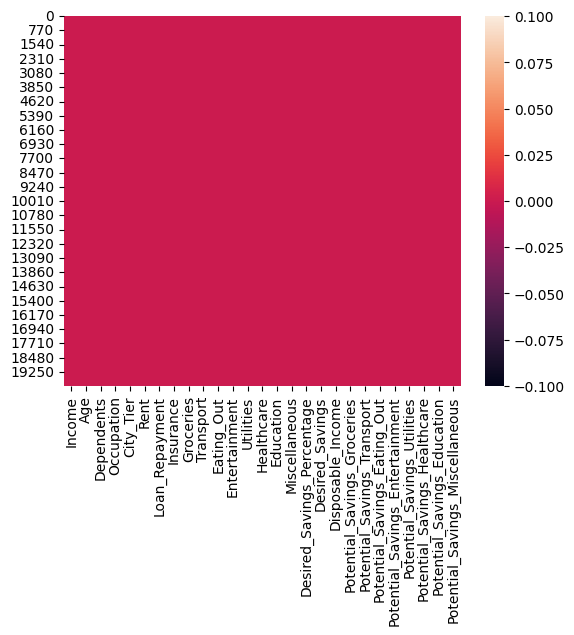

In [10]:
sns.heatmap(df.isnull())

## Detección de Outliers

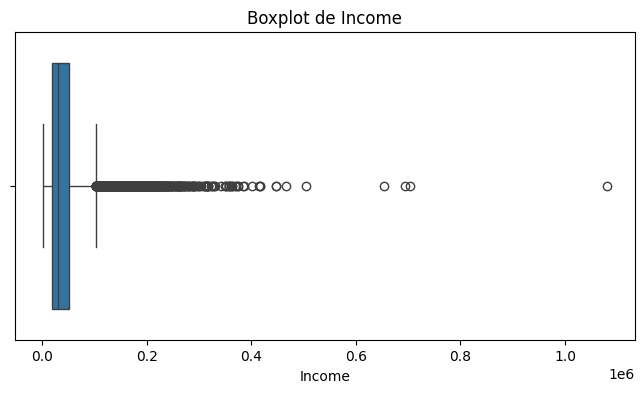

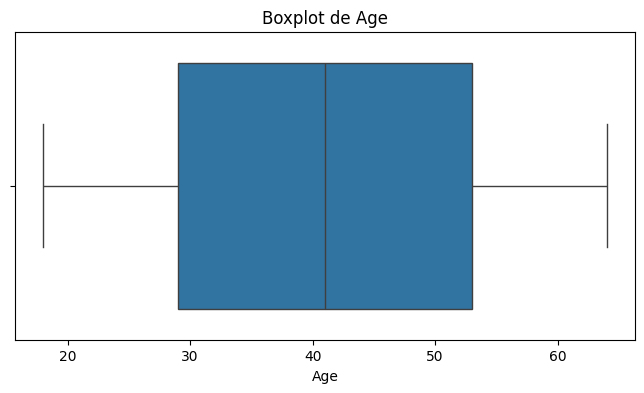

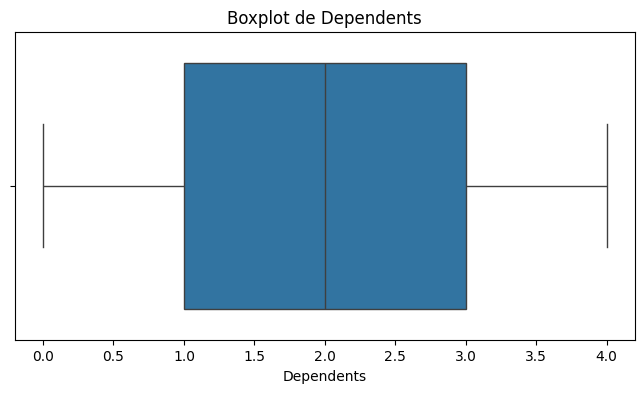

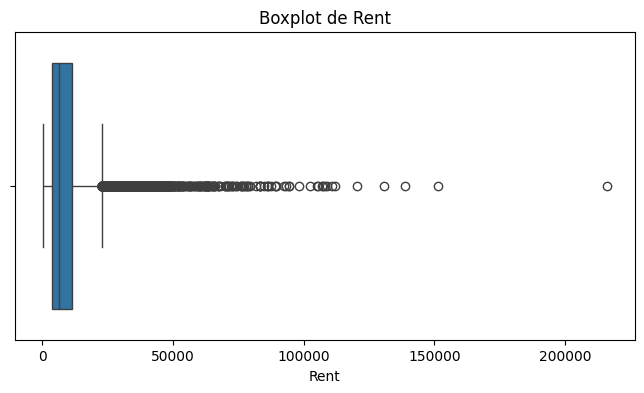

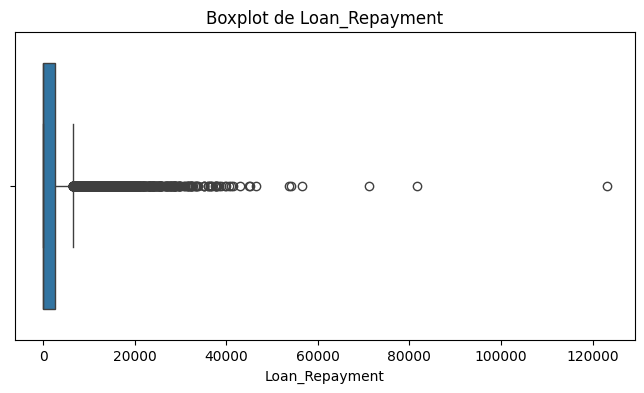

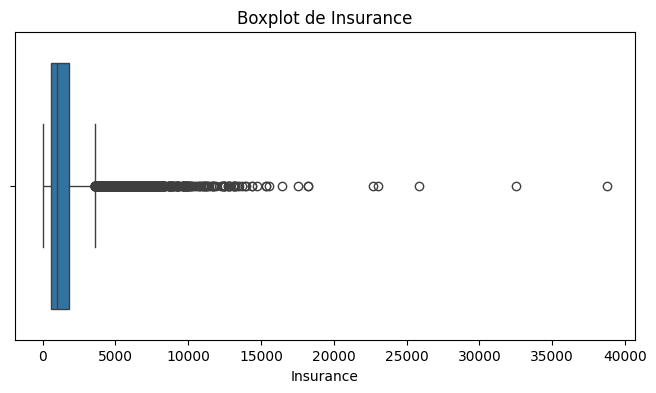

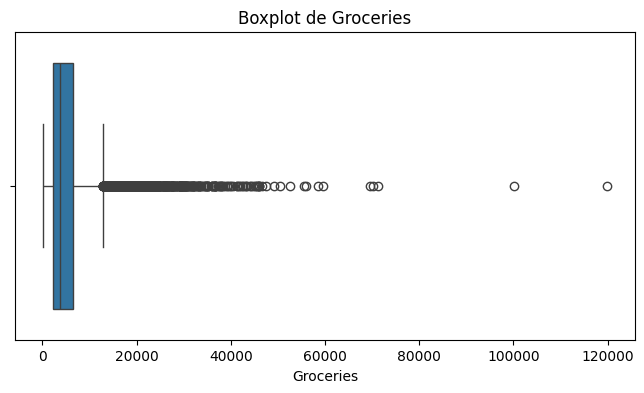

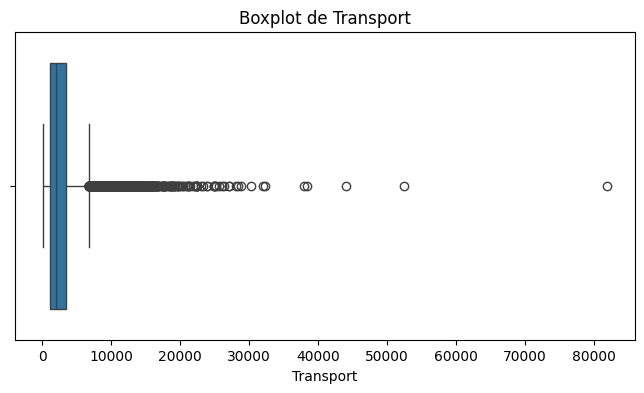

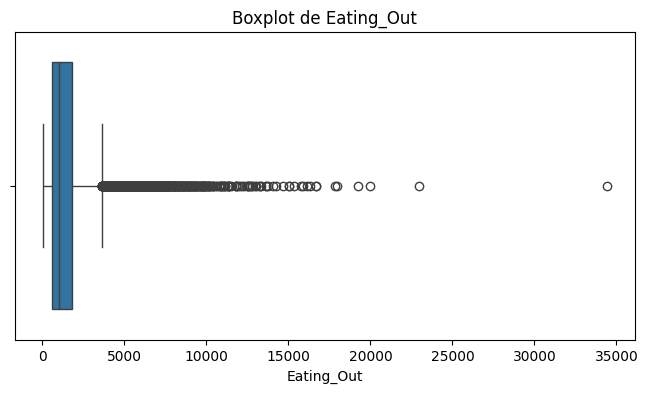

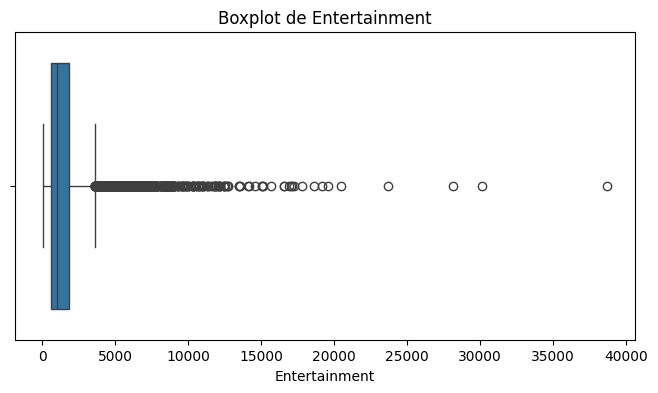

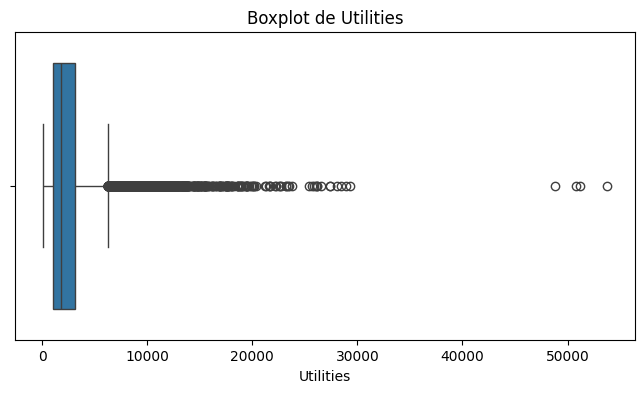

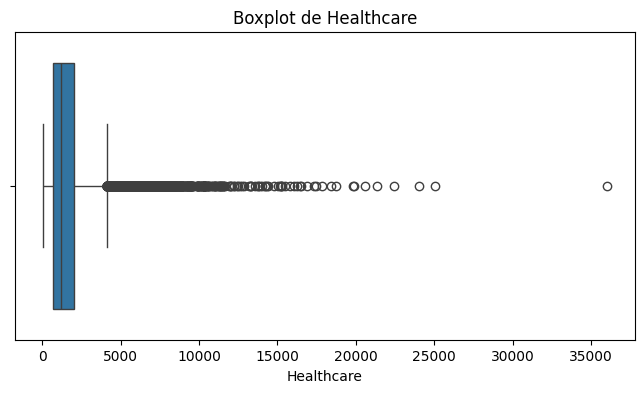

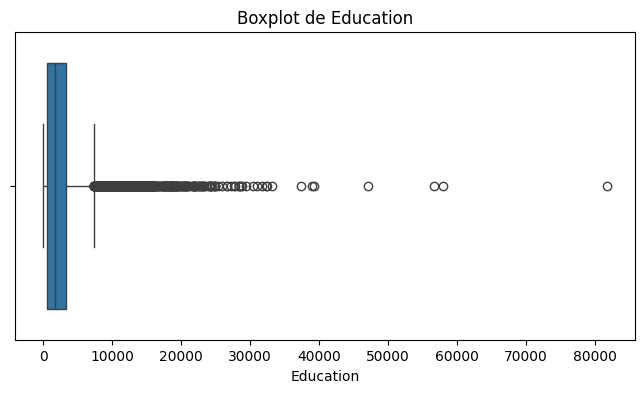

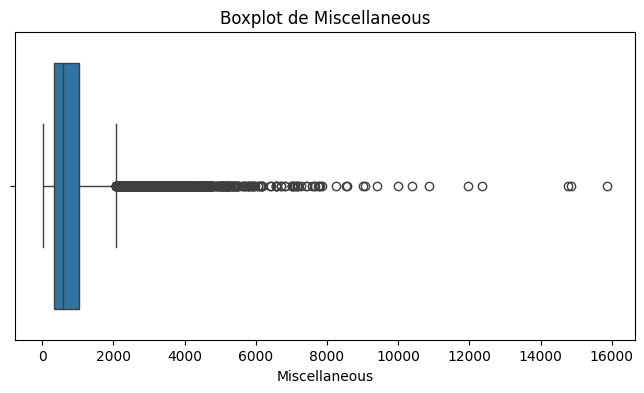

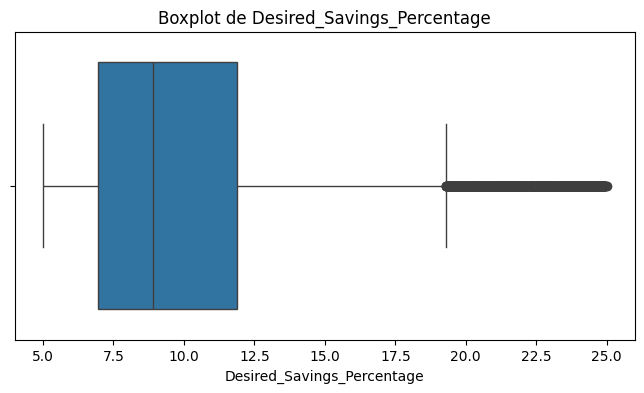

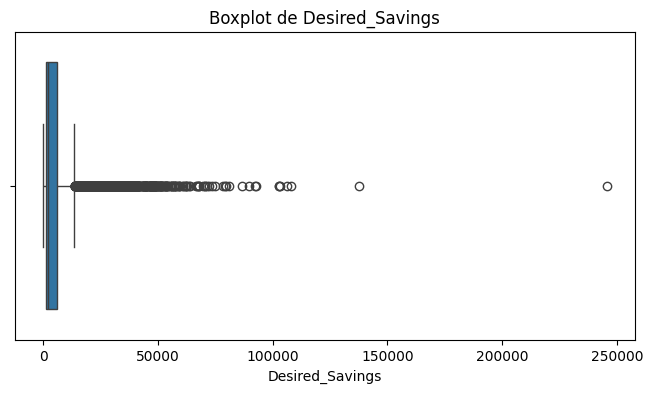

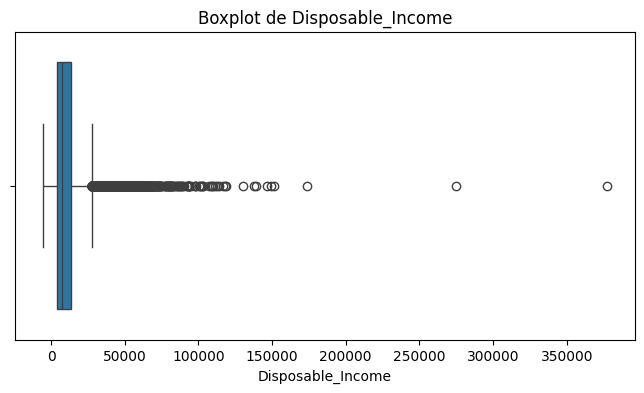

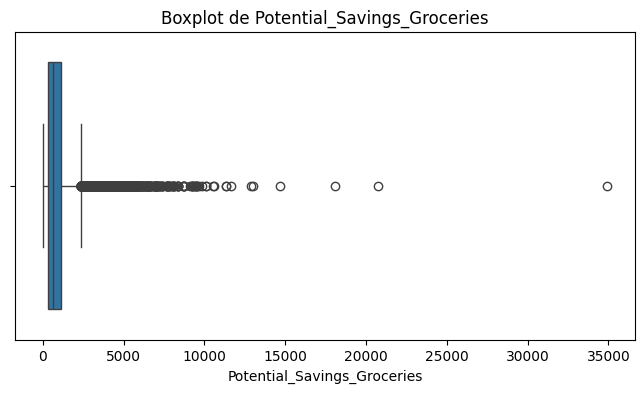

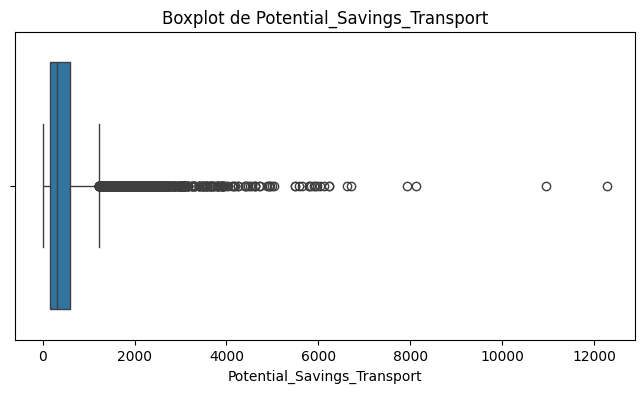

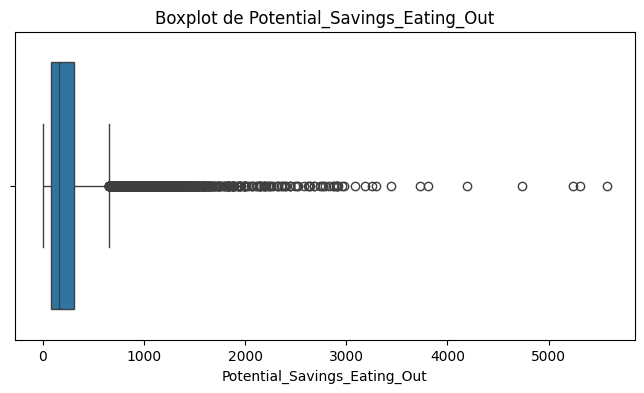

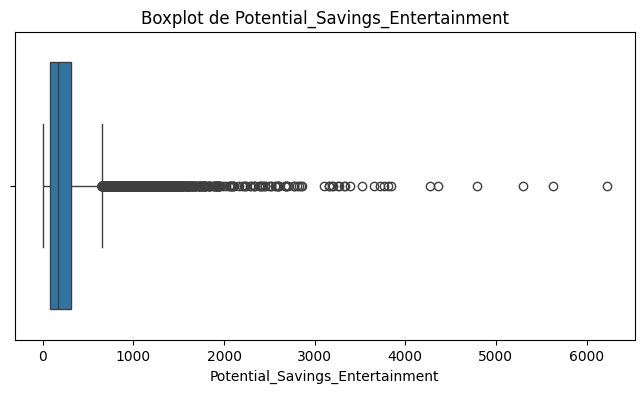

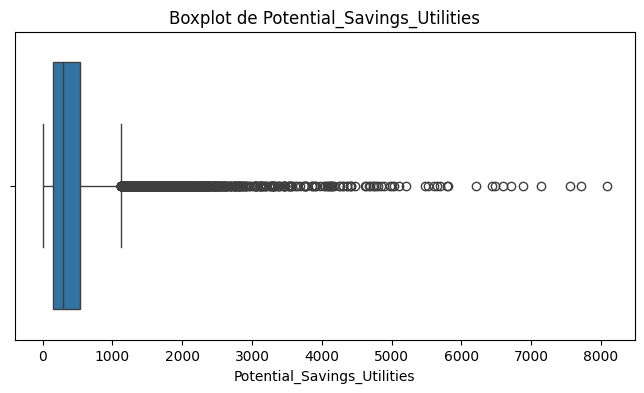

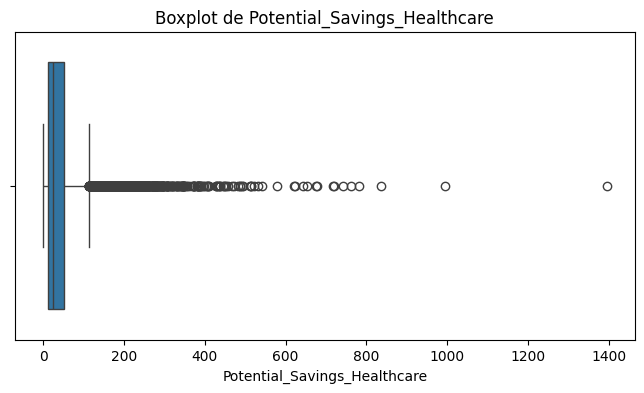

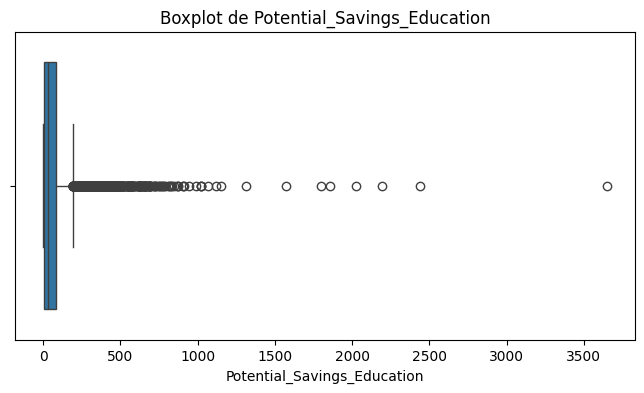

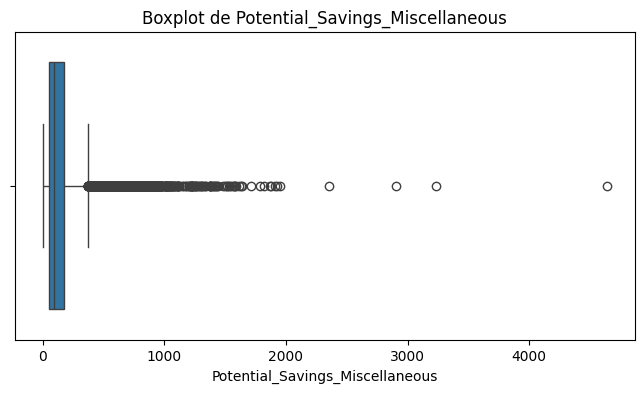

In [19]:
# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Boxplots para todas las columnas numéricas
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

## EDA

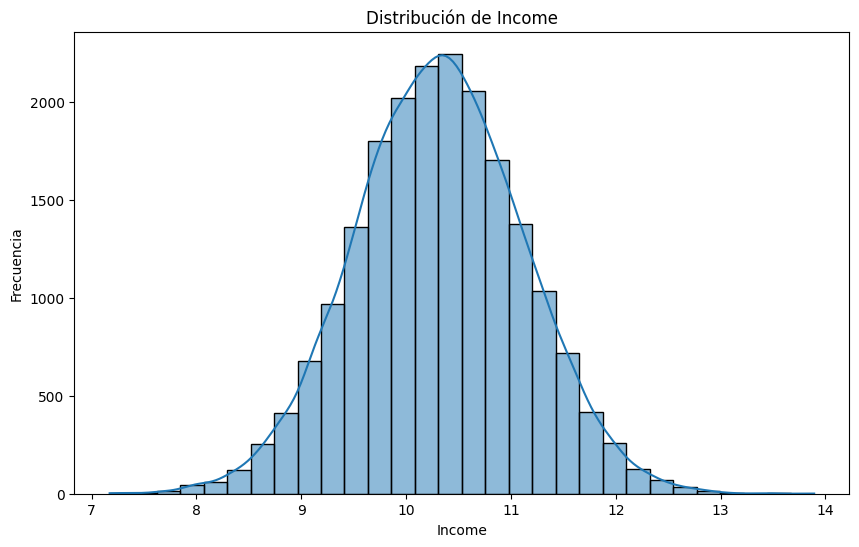

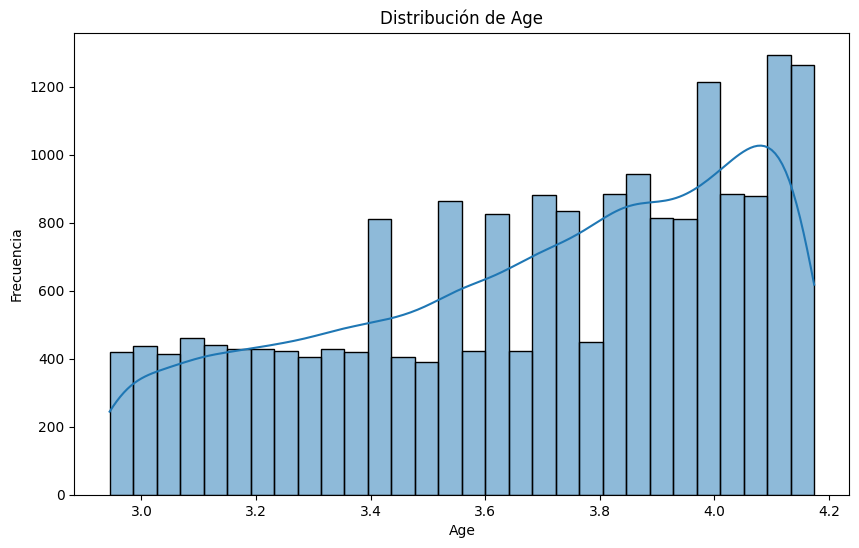

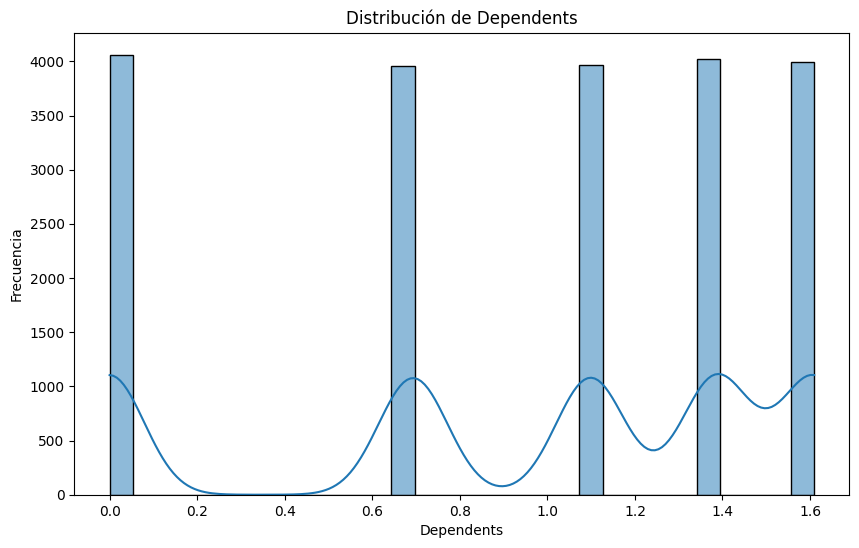

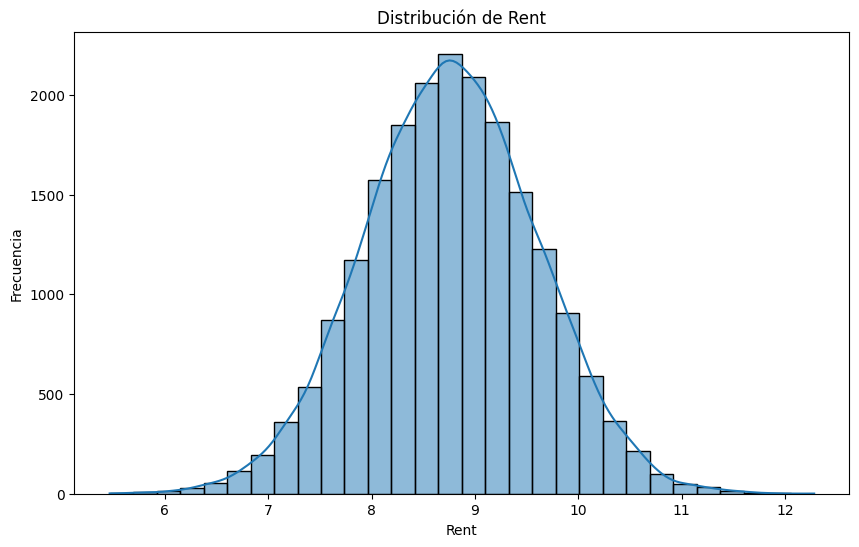

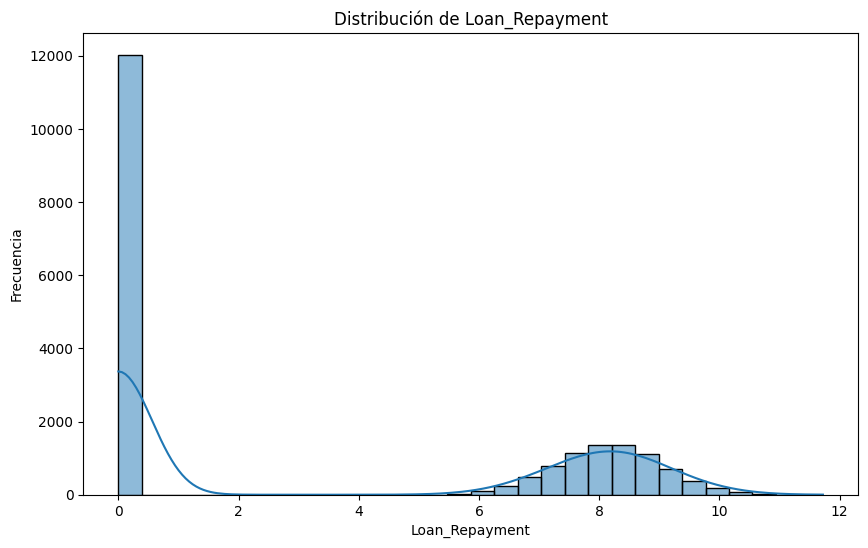

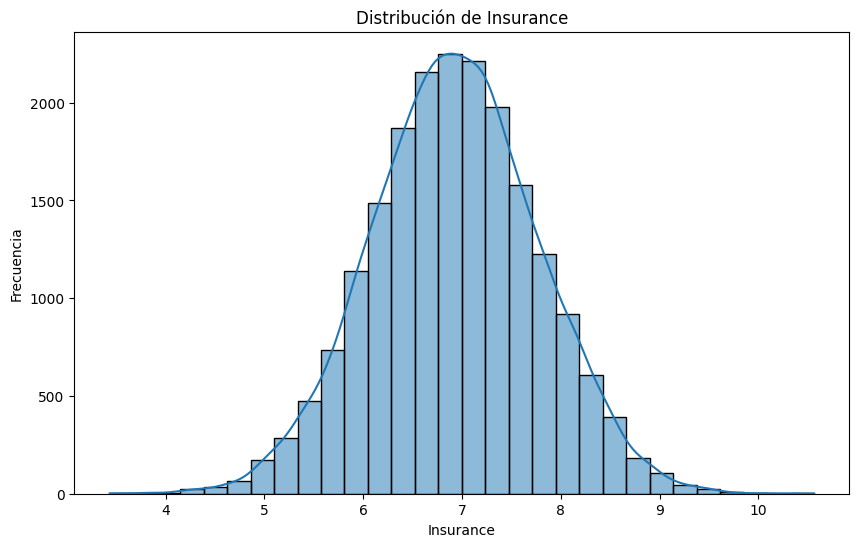

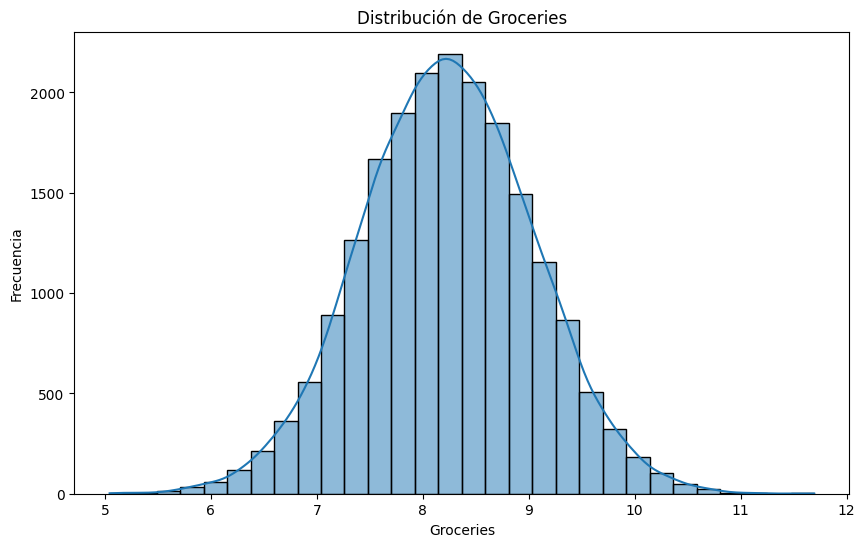

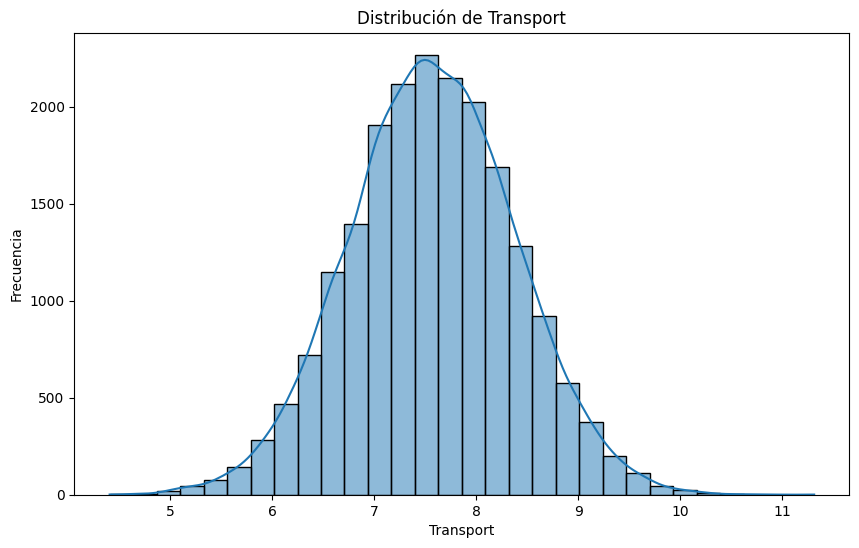

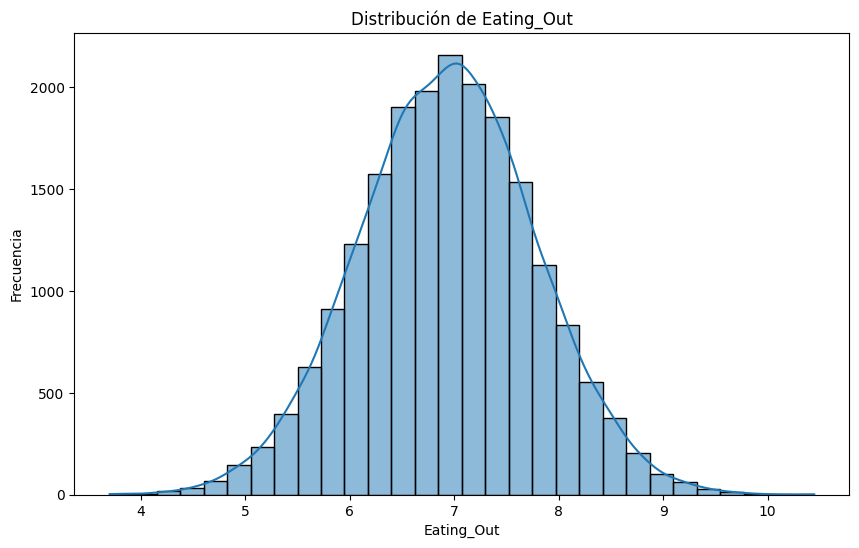

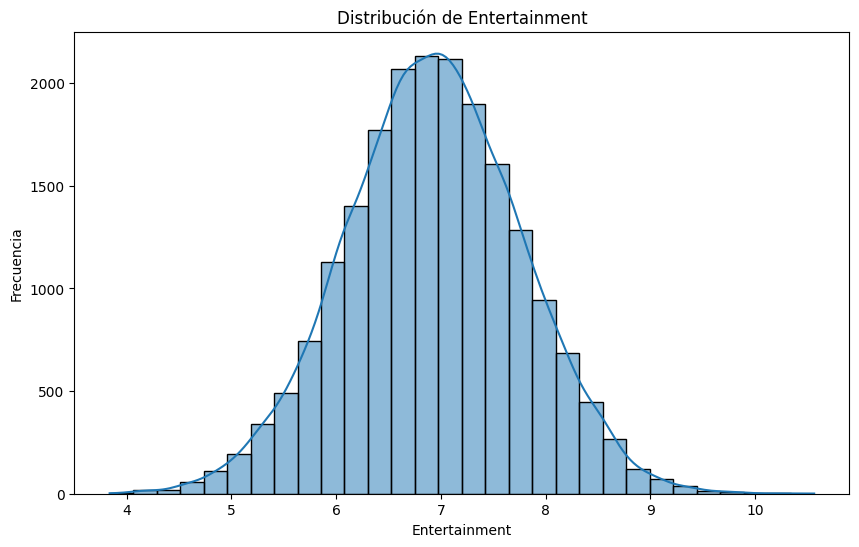

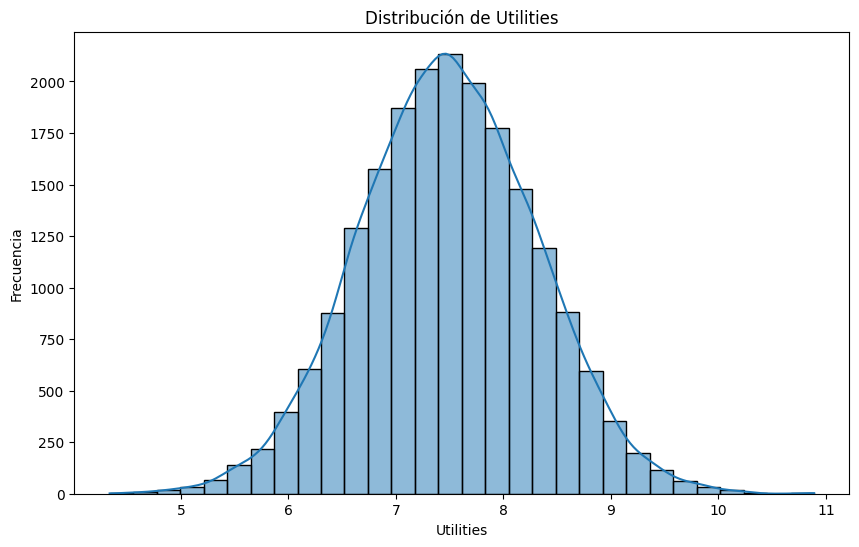

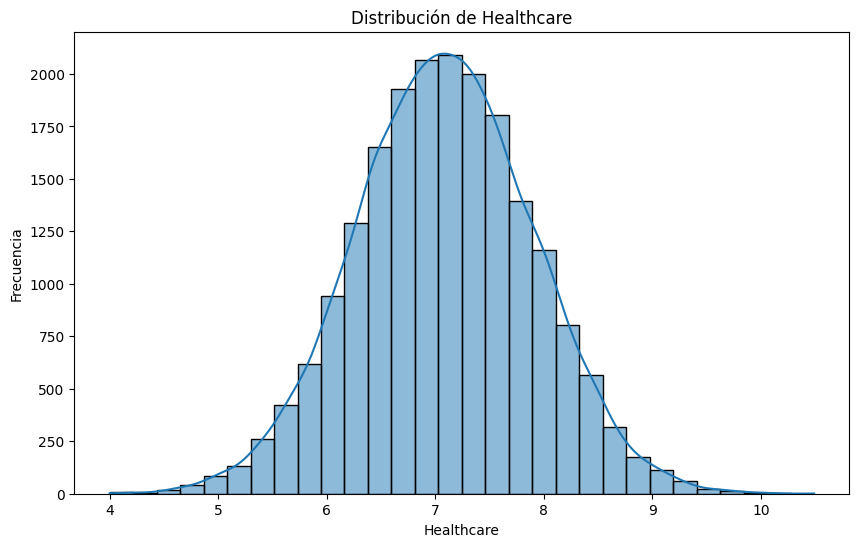

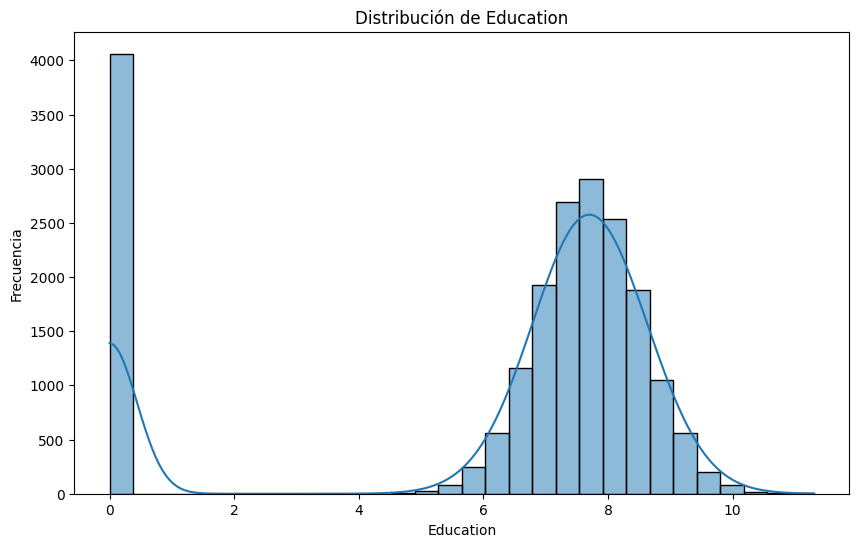

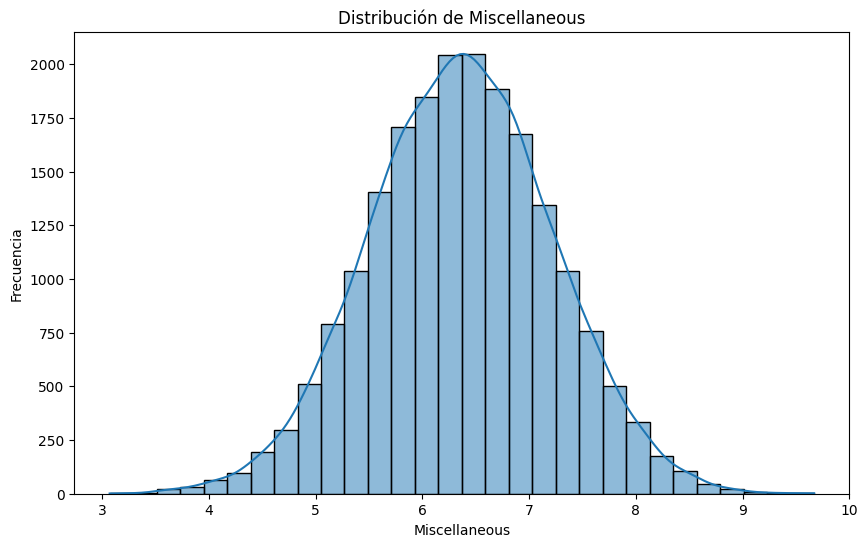

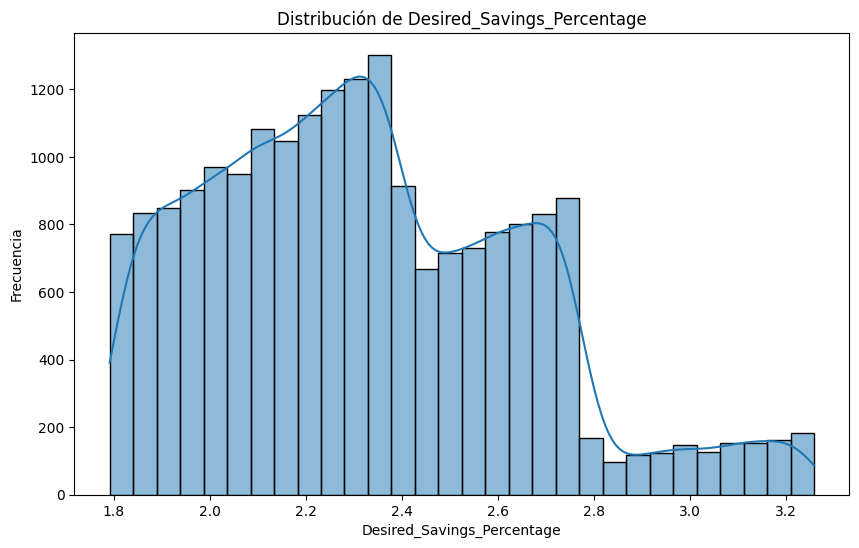

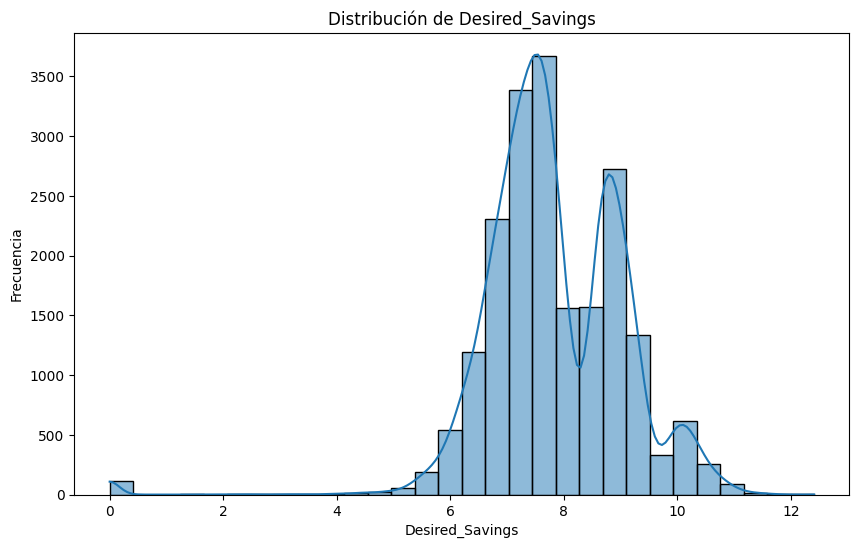

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


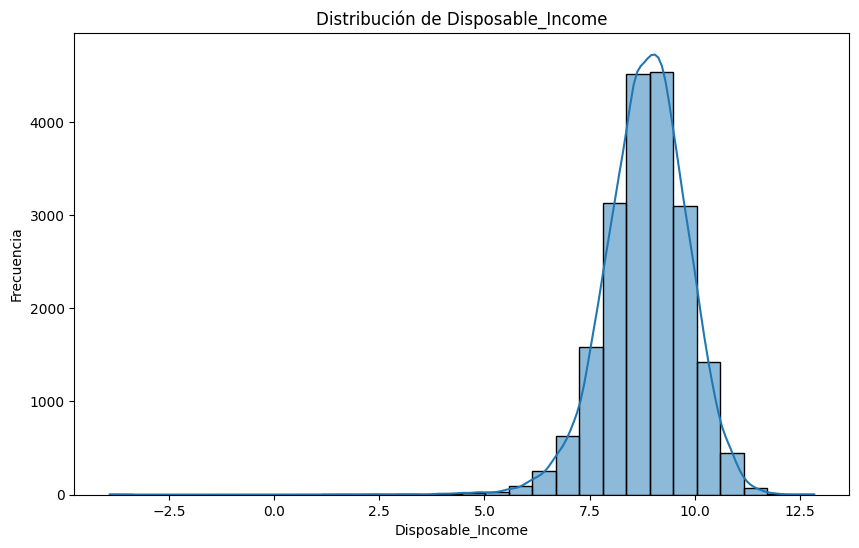

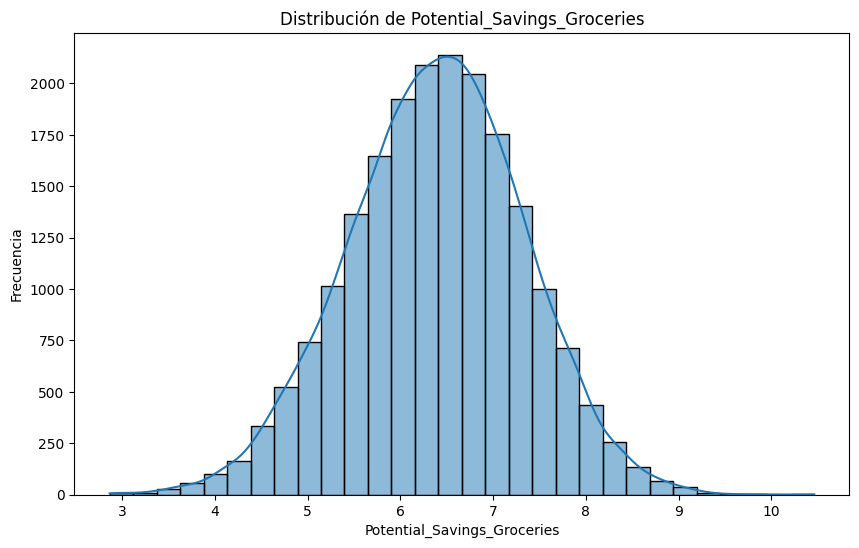

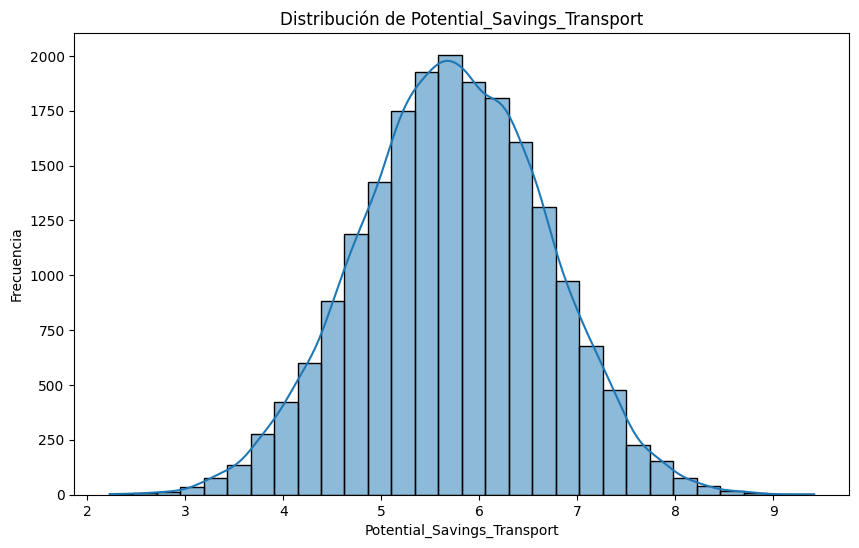

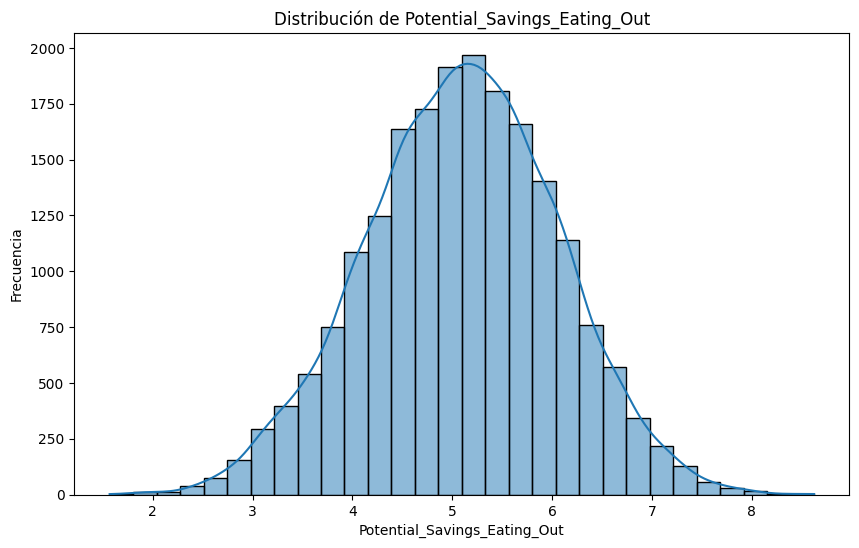

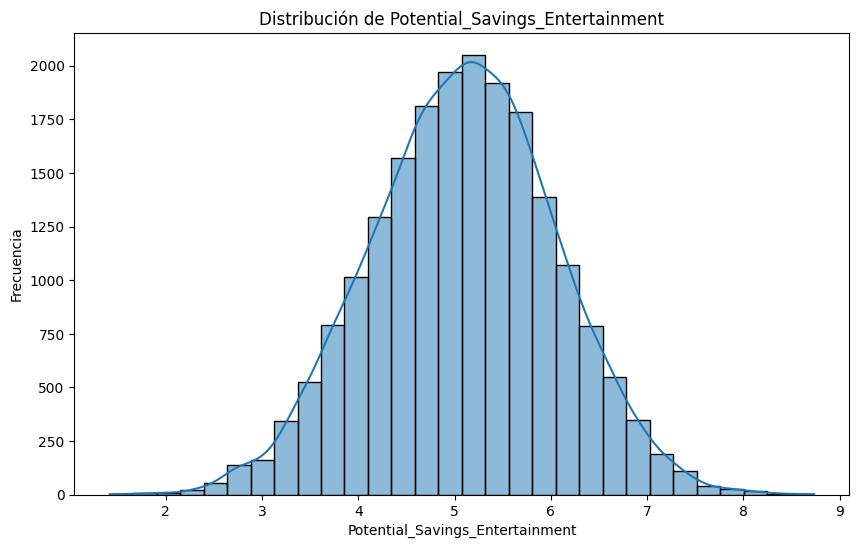

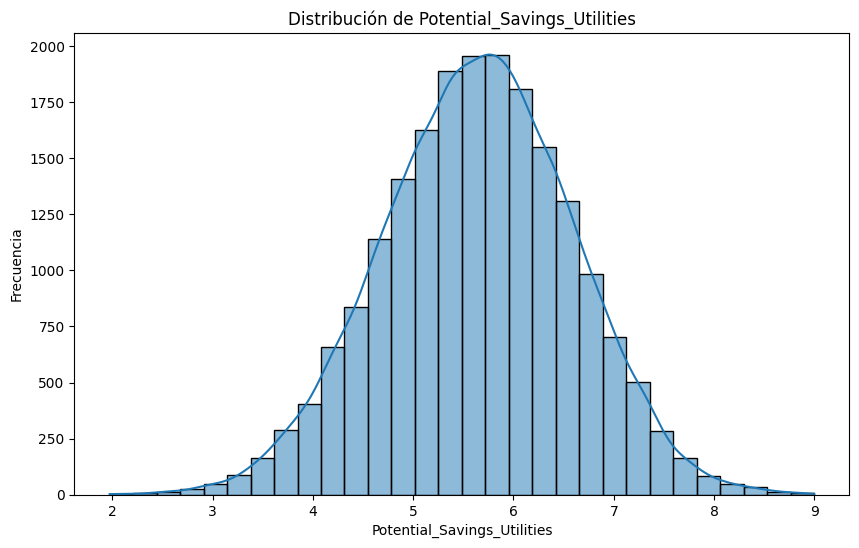

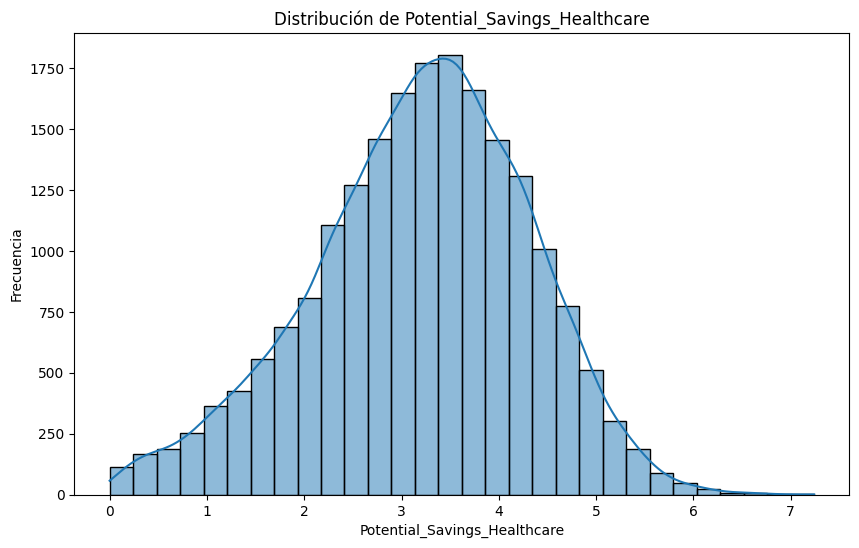

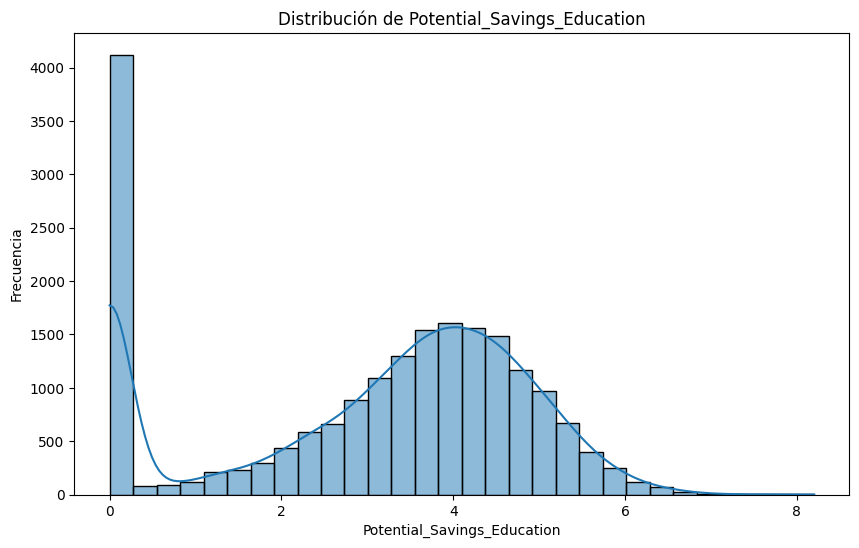

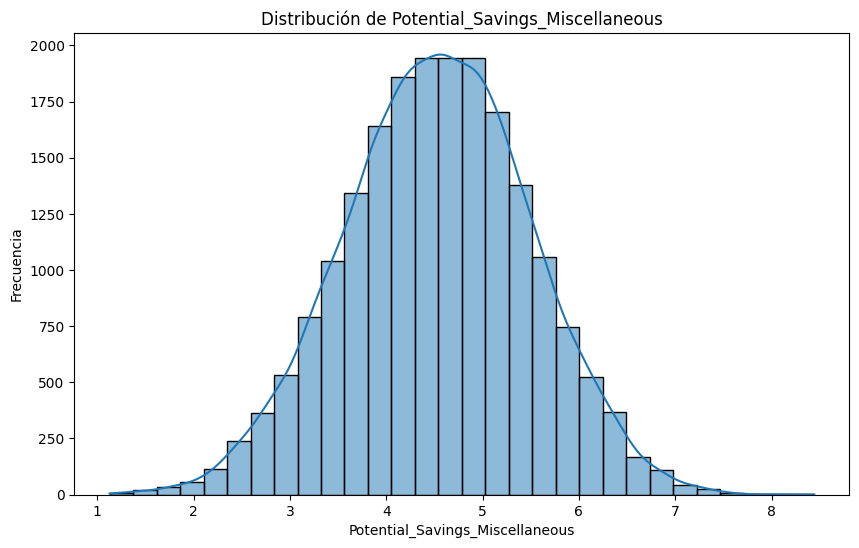

In [31]:
numeric_cols=df.select_dtypes(include=['float64', 'int64']).columns
# Crear un bucle para mostrar la distribución de las columnas numéricas
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(np.log1p(df[col]), bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()
plt.show()



## Matriz de Correlacion

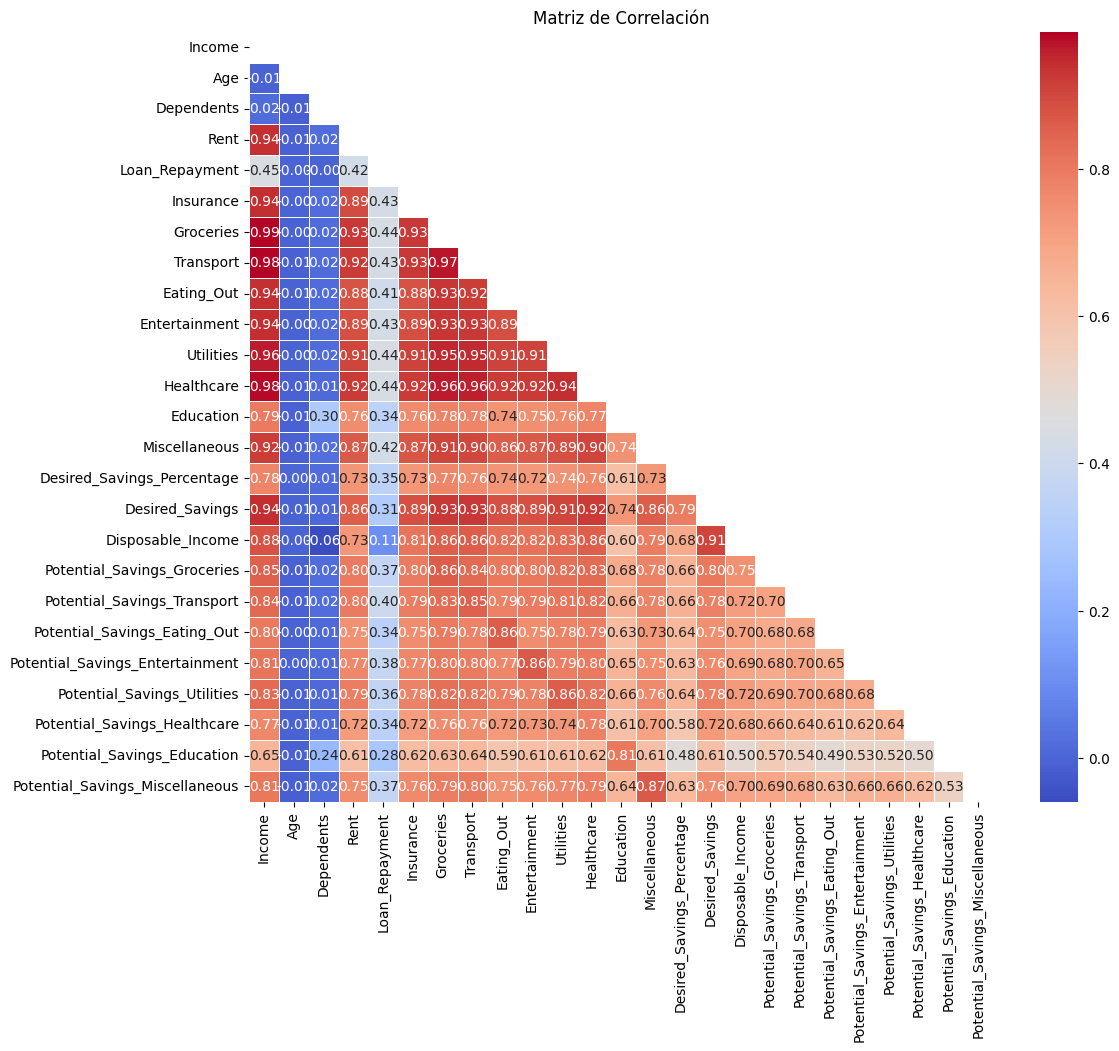

In [37]:
# Calcular la matriz de correlación
corr = df[numeric_cols].corr()

# Generar una máscara para la parte superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Dibujar el mapa de calor con la máscara
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Matriz de Correlación')
plt.show()

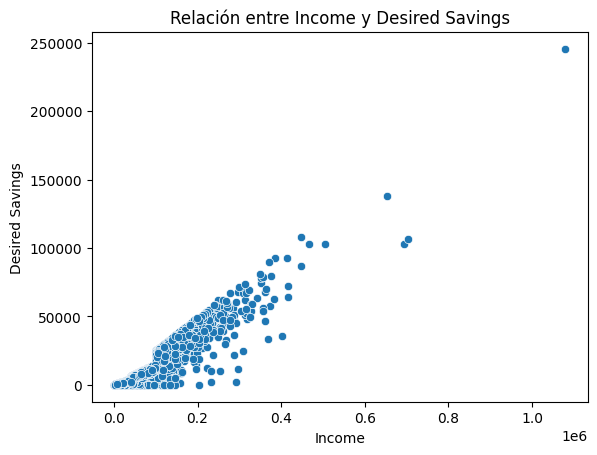

In [30]:
# Gráfico de dispersión
sns.scatterplot(data=df, x='Income', y='Desired_Savings')
plt.title('Relación entre Income y Desired Savings')
plt.xlabel('Income')
plt.ylabel('Desired Savings')
plt.show()


In [35]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

In [36]:
df['Total_Expenses'] = df[['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']].sum(axis=1)
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_Expenses
0,44637.25,49,0,Self_Employed,Tier_1,13391.17,0.00,2206.49,6658.77,2636.97,...,11265.63,1685.70,328.90,465.77,195.15,678.29,67.68,0.00,85.74,33371.61
1,26858.60,34,2,Retired,Tier_2,5371.72,0.00,869.52,2818.44,1543.02,...,9676.82,540.31,119.35,141.87,234.13,286.67,6.60,56.31,97.39,17181.77
2,50367.61,35,1,Student,Tier_3,7555.14,4612.10,2201.80,6313.22,3221.40,...,13891.45,1466.07,473.55,410.86,459.97,488.38,7.29,106.65,138.54,36476.16
3,101455.60,21,0,Self_Employed,Tier_3,15218.34,6809.44,4889.42,14690.15,7106.13,...,31617.95,1875.93,762.02,1241.02,320.19,1389.82,193.50,0.00,296.04,69837.65
4,24875.28,52,4,Professional,Tier_2,4975.06,3112.61,635.91,3034.33,1276.16,...,6265.70,788.95,68.16,61.71,187.17,194.12,47.29,67.39,96.56,18609.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.47,51,4,Self_Employed,Tier_1,12274.04,7703.85,1646.80,5477.40,2084.23,...,1163.32,597.03,287.32,347.66,145.84,212.83,44.90,98.77,190.59,39750.14
19996,90295.77,21,1,Student,Tier_2,18059.15,0.00,2770.59,13118.22,4633.11,...,30725.18,3854.82,359.60,911.27,424.06,1555.55,129.66,239.45,351.44,59570.59
19997,40604.57,30,1,Professional,Tier_2,8120.91,8089.61,1548.56,6018.28,2493.56,...,2267.91,1385.51,379.93,138.21,297.70,824.57,57.89,72.73,122.57,38336.66
19998,118157.82,27,2,Professional,Tier_1,35447.35,12345.91,4735.67,16392.44,8248.24,...,10603.68,3217.77,2265.87,726.25,273.91,859.23,98.96,92.19,569.81,107554.13


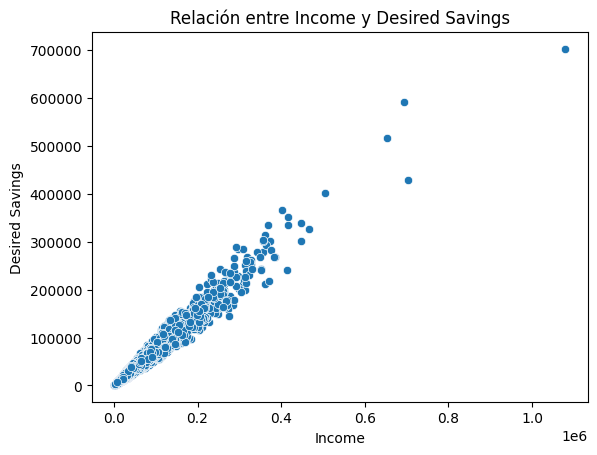

In [38]:
# Gráfico de dispersión
sns.scatterplot(data=df, x='Income', y='Total_Expenses')
plt.title('Relación entre Income y Desired Savings')
plt.xlabel('Income')
plt.ylabel('Desired Savings')
plt.show()

<Axes: xlabel='Total_Expenses', ylabel='Count'>

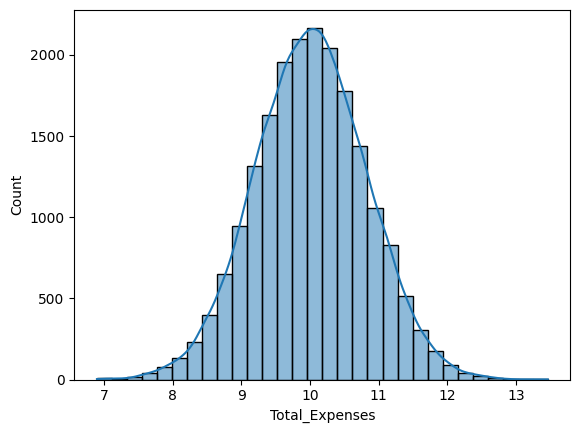

In [40]:
sns.histplot(np.log1p(df['Total_Expenses']), bins=30, kde=True)

In [50]:
scaler = StandardScaler()
selected_columns = ['Income','Age', 'Disposable_Income', 'Rent', 'Groceries']  # Ejemplo
scaled_data = scaler.fit_transform(df[selected_columns])


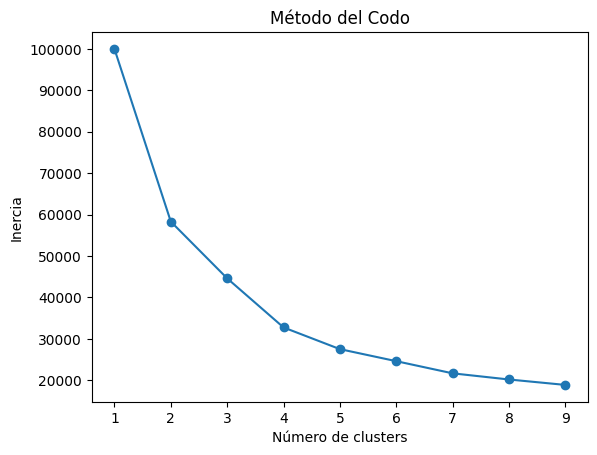

In [ ]:
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()


In [45]:
# Seleccionar la columna Total_Expenses
total_expenses = df[['Total_Expenses']]

# Escalar los datos
scaler = StandardScaler()
total_expenses_scaled = scaler.fit_transform(total_expenses)

# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Expense_Cluster'] = kmeans.fit_predict(total_expenses_scaled)

# Asignar nombres a los clusters
df['Expense_Cluster'] = df['Expense_Cluster'].map({0: 'Gasto Bajo', 1: 'Gasto Medio', 2: 'Gasto Alto'})

# Mostrar los primeros registros con el nuevo cluster
df[['Total_Expenses', 'Expense_Cluster']].head()

,Total_Expenses,Expense_Cluster
0,33371.61,Gasto Bajo
1,17181.77,Gasto Bajo
2,36476.16,Gasto Bajo
3,69837.65,Gasto Medio
4,18609.61,Gasto Bajo


In [46]:
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_Expenses,Expense_Cluster
0,44637.25,49,0,Self_Employed,Tier_1,13391.17,0.00,2206.49,6658.77,2636.97,...,1685.70,328.90,465.77,195.15,678.29,67.68,0.00,85.74,33371.61,Gasto Bajo
1,26858.60,34,2,Retired,Tier_2,5371.72,0.00,869.52,2818.44,1543.02,...,540.31,119.35,141.87,234.13,286.67,6.60,56.31,97.39,17181.77,Gasto Bajo
2,50367.61,35,1,Student,Tier_3,7555.14,4612.10,2201.80,6313.22,3221.40,...,1466.07,473.55,410.86,459.97,488.38,7.29,106.65,138.54,36476.16,Gasto Bajo
3,101455.60,21,0,Self_Employed,Tier_3,15218.34,6809.44,4889.42,14690.15,7106.13,...,1875.93,762.02,1241.02,320.19,1389.82,193.50,0.00,296.04,69837.65,Gasto Medio
4,24875.28,52,4,Professional,Tier_2,4975.06,3112.61,635.91,3034.33,1276.16,...,788.95,68.16,61.71,187.17,194.12,47.29,67.39,96.56,18609.61,Gasto Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.47,51,4,Self_Employed,Tier_1,12274.04,7703.85,1646.80,5477.40,2084.23,...,597.03,287.32,347.66,145.84,212.83,44.90,98.77,190.59,39750.14,Gasto Medio
19996,90295.77,21,1,Student,Tier_2,18059.15,0.00,2770.59,13118.22,4633.11,...,3854.82,359.60,911.27,424.06,1555.55,129.66,239.45,351.44,59570.59,Gasto Medio
19997,40604.57,30,1,Professional,Tier_2,8120.91,8089.61,1548.56,6018.28,2493.56,...,1385.51,379.93,138.21,297.70,824.57,57.89,72.73,122.57,38336.66,Gasto Bajo
19998,118157.82,27,2,Professional,Tier_1,35447.35,12345.91,4735.67,16392.44,8248.24,...,3217.77,2265.87,726.25,273.91,859.23,98.96,92.19,569.81,107554.13,Gasto Alto


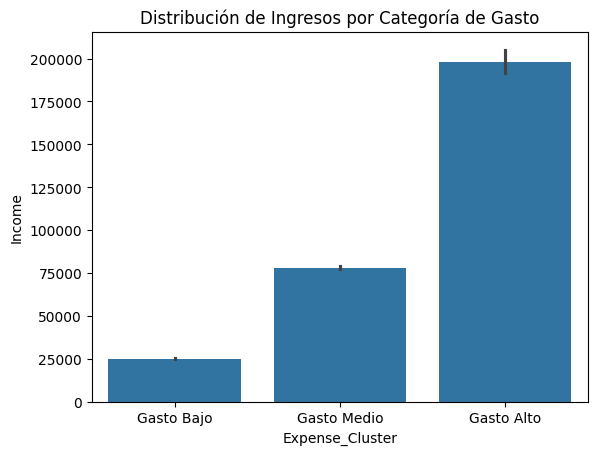

In [55]:
sns.barplot(x='Expense_Cluster', y='Income', data=df)
plt.title('Distribución de Ingresos por Categoría de Gasto')
plt.show()

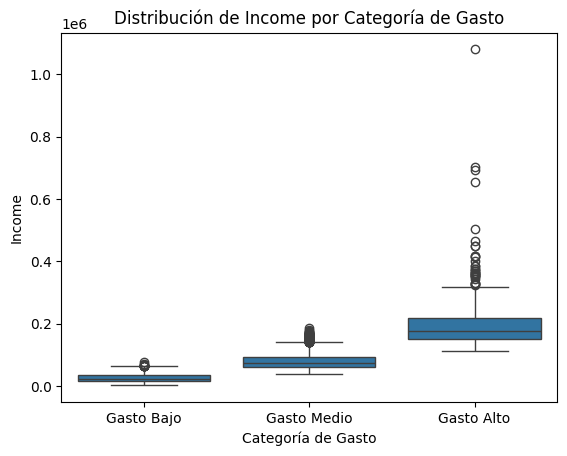

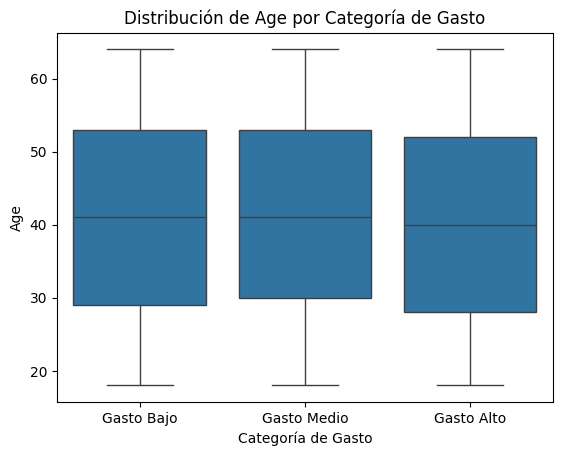

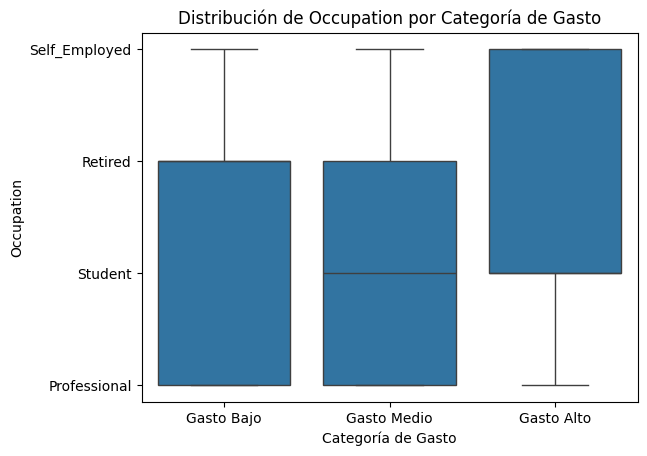

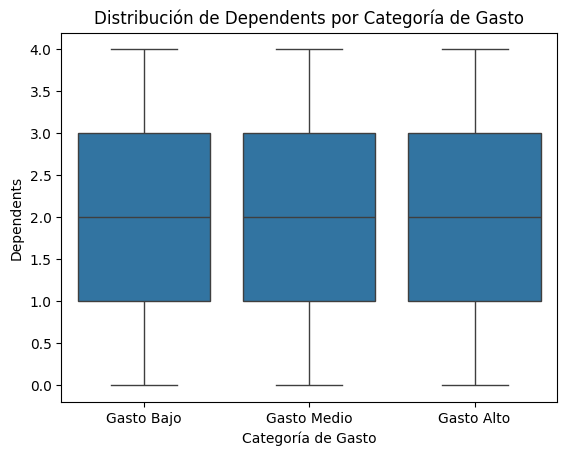

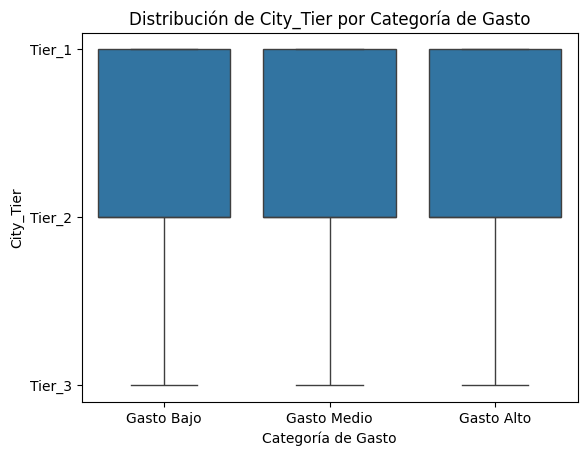

In [59]:
for col in['Income','Age','Occupation','Dependents','City_Tier']:
    sns.boxplot(x='Expense_Cluster', y=col, data=df)
    plt.xlabel('Categoría de Gasto')
    plt.ylabel(col)
    plt.title(f'Distribución de {col} por Categoría de Gasto')
    plt.show()
plt.show()

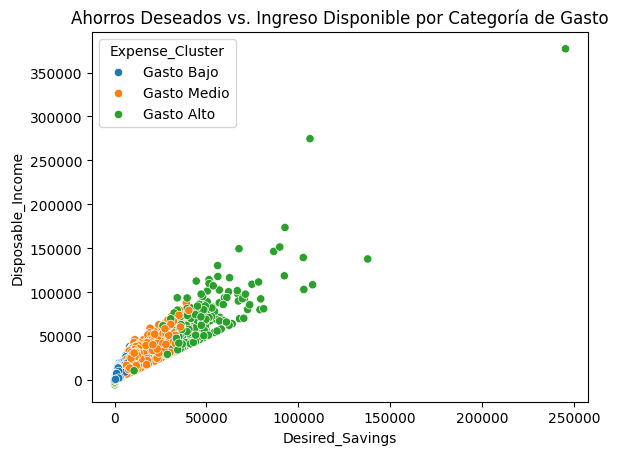

In [65]:
sns.scatterplot(x='Desired_Savings', y='Disposable_Income', hue='Expense_Cluster', data=df)
plt.title('Ahorros Deseados vs. Ingreso Disponible por Categoría de Gasto')
plt.show()


In [69]:
df.groupby('Expense_Cluster')[['Income', 'Disposable_Income', 'Total_Expenses']].describe()


Income                                                       \
                   count           mean           std        min          25%   
Expense_Cluster                                                                 
Gasto Alto         542.0  198029.347694  82407.807675  111723.89  151251.5525   
Gasto Bajo       15002.0   25079.621258  12727.127723    1301.19   14946.9150   
Gasto Medio       4456.0   78126.915918  24229.479932   39138.20   59804.2325   

                                                     Disposable_Income  \
                        50%          75%         max             count   
Expense_Cluster                                                          
Gasto Alto       175410.510  219014.9975  1079728.37             542.0   
Gasto Bajo        23313.065   34102.8750    75204.42           15002.0   
Gasto Medio       72294.575   91614.9650   184630.62            4456.0   

                               ...                        Total_Expenses  \
                         mean  ...         75%        max          count   
Expense_Cluster                ...                                         
Gasto Alto       45469.545701  ...  58586.7475  377060.22          542.0   
Gasto Bajo        6713.073038  ...   9223.1675   38091.31        15002.0   
Gasto Medio      19657.389933  ...  25844.7500   87650.18         4456.0   

                                                                               \
                          mean           std        min        25%        50%   
Expense_Cluster                                                                 
Gasto Alto       152559.802380  60032.955719  105593.18  117868.28  132367.13   
Gasto Bajo        18366.548228   9161.563939     988.41   10879.10   17186.22   
Gasto Medio       58469.525947  16678.832909   38391.55   44939.03   53751.11   

                                         
                         75%        max  
Expense_Cluster                          
Gasto Alto       165428.6000  702668.15  
Gasto Bajo        25308.8650   38367.47  
Gasto Medio       68415.2175  105291.37  

[3 rows x 24 columns]

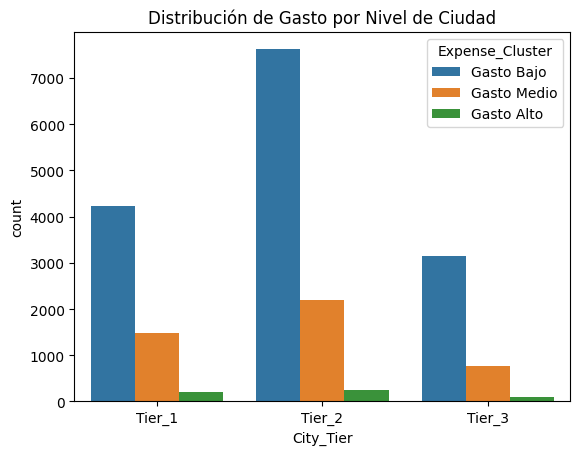

In [71]:
sns.countplot(x='City_Tier', hue='Expense_Cluster', data=df)
plt.title('Distribución de Gasto por Nivel de Ciudad')
plt.show()


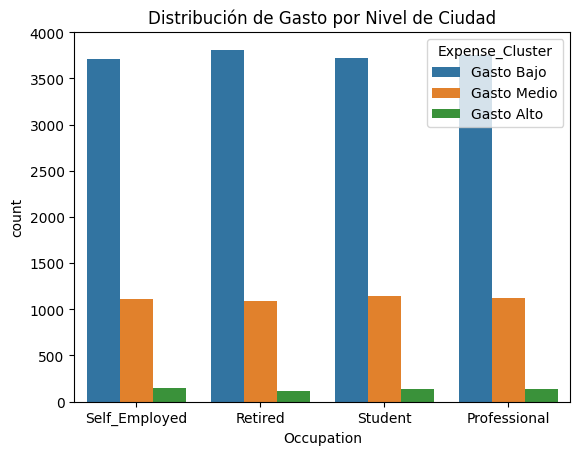

In [72]:
sns.countplot(x='Occupation', hue='Expense_Cluster', data=df)
plt.title('Distribución de Gasto por Nivel de Ciudad')
plt.show()

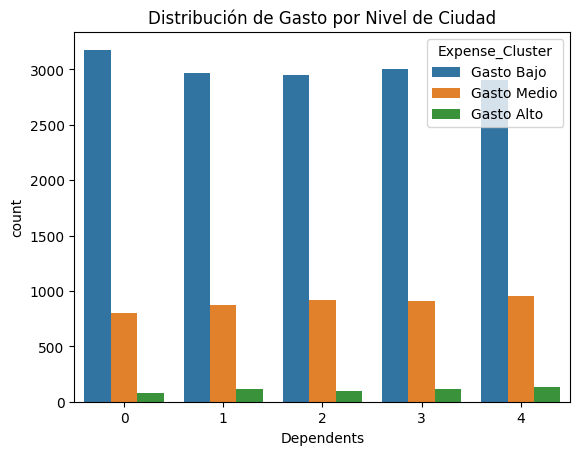

In [73]:
sns.countplot(x='Dependents', hue='Expense_Cluster', data=df)
plt.title('Distribución de Gasto por Nivel de Ciudad')
plt.show()